# **XARRAY**

 **What is xarray?**
* *This is an open source project and Python package. It has been designed purposefully for data analysis on multidimensional arrays.*
* *xarray is built on top of the dataprocessing library known as Pandas.*
* *implements the use of dataset files in multiple openings and singular openings into one data variable* 

**Characteristics of Data**

Data input that can be worked on in the xarray package include datasets that are:
* Numeric
* Multi-dimensional
* Labelled 
* (lots of) metadata
* sometimes very large 

Xarray package is used to work on 
* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering(signal/ image processing), and biological sciences.
* Integration with other data analysis packages such as Pandas
* I/O operations ( NetCDF)
* Plotting 

#**USING XARRAY FOR CLIMATE APPLICATION**

Like Pandas, Xarray has data structures that it works with. That is namely 
1. a DataArray
2. a Dataset 

**DataArray**

This is data holds a single multi dimensional variable and its coordinates.
It has four essential attributes which are:


*   values : a numpy.ndarray holding the array's values
*   dims : dimensions names for each axis(eg., ('year','x','y') ).
*   coords : a dict-like container of arrays(coordinates) that label each point. (eg., 1-dimensional arrays of numbers, datetime objects or strings)
*   attrs : an OrderedDict to hold arbitrary metadata(attributes of the file or variable or array).

**Constructing A DataArray**

Firstly import the required packages that are going to be used to work. If you have not already downloaded the Xarray Package,check https://anaconda.org/anaconda/xarray to install it. 




In [1]:
import numpy as np           #using the as in this case is serving as an alias for numpy.
import matplotlib.pyplot as plt 
import xarray as xr 
#%matplotlib inline            #prevents plots from opening in a new display window
plt.figure(figsize=(8,5), dpi=300)     #setting the box size of the plotting area

<Figure size 2400x1500 with 0 Axes>

Creation of the DataArray after importing the required packages.


In [2]:
Darray=xr.DataArray([3,4,2,6,7,9])
Darray

<xarray.DataArray (dim_0: 6)>
array([3, 4, 2, 6, 7, 9])
Dimensions without coordinates: dim_0

Now we can add the essential attributes that give more meaning to the DataArray that has been created. 

In [3]:
Darray=xr.DataArray([3,4,2,6,7,9], dims=['money'])

In [4]:
Darray

<xarray.DataArray (money: 6)>
array([3, 4, 2, 6, 7, 9])
Dimensions without coordinates: money

Now we would want to add the coordinate to the DataArray that we created

In [5]:
Darray=xr.DataArray([3,4,2,6,7,9], dims=['date'],
                   coords = {'date' : [2,4,6,8,10,12]})
Darray

<xarray.DataArray (date: 6)>
array([3, 4, 2, 6, 7, 9])
Coordinates:
  * date     (date) int64 2 4 6 8 10 12

To one interesting part of the Xarray Package, it has embeded in it the plotting function.
So now we can plot out DataArray Darray using the plot function built in Xarray.

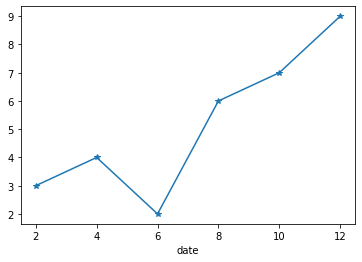

In [6]:
Darray.plot(marker='*') 

**Multidimensional DataArray**

Using Xarray for multidimensional analysis is quite easy as compared to othe options or packages. 
Calling in the file that will be used for the computation or analysis can be done in many ways which include using:
*  xr.open_dataset("datafilename")
* xr.open_mfdataset("link to multiple files with a common wildcard")
* or, download the data separately and load with other means such as pandas or numpy, etc(np.load())

Now lets go in for our multidemsional dataset that we are going to use in out analysis.


In [1]:
import xarray as xr
import numpy as np
#nc_data = xr.open_dataset('/home/quagraine/Desktop/projdata/JJA.cru_ts4.1901_2017.tmx.nc')
#using numpy to load data
np_data = np.load("argo_float_4901412.npz")

 Now the dataset has been loaded into the variable *nc*. To go further and check the keys of the data or the content head of the data, we use  ***dataname.keys()***

In [26]:
#nc_data.keys()
#np_data.keys()
np_data.values

<bound method Mapping.values of <numpy.lib.npyio.NpzFile object at 0x7fa1d1ac76a0>>

Now we are able to see what the contents of the dataset. That is the dimensions, the coordinates,  the data variables and the attributes. 
So now let us assign the elements of the data to specific variables. 

In [31]:
#assigning a variable to a variable holder in xarray 
#T_max = nc_data.tmx
#T_lon = nc_data.lon
#T_lat = nc_data.lat 
#print(T_max.shape,T_lon.shape, T_lat.shape)
#assigning a variable to a variable holder in numpy
S = np_data.f.S
T = np_data.f.T
P = np_data.f.P
alts = np_data.f.levels
lons = np_data.f.lon
lats = np_data.f.lat
dates = np_data.f.date
print(S.shape,T.shape,P.shape,alts.shape,lats.shape,lons.shape)


(78, 75) (78, 75) (78, 75) (78,) (75,) (75,)


The numpy data that was loaded is a compressed file that contains separate data files(multidimensional) which have now been called into variable holders.Now, let's see if we can create a DataArray using xarray giving it some dimensions and attributes to be able to work on it just as we would do with the Temperature data(T_max) that has been loaded using the xarray ***xr.open_dataset()***  command.

We consider the Pressure data and arrange it into an xarray form with ***xr.DataArray()***

In [10]:
DA_Press = xr.DataArray(P,dims=['alt','date'],  #where alt and date are dimension containers
                       coords={'alt':alts,
                              'date':dates},) # so we assign alts and dates as coordinates alt and date respectively 
DA_Press

<xarray.DataArray (alt: 78, date: 75)>
array([[   6.8     ,    6.1     ,    6.5     , ...,    7.1     ,    7.2     ,
           6.5     ],
       [  10.7     ,   10.599999,   10.4     , ...,   10.799999,   11.099999,
          10.4     ],
       [  15.7     ,   14.099999,   14.9     , ...,   15.9     ,   15.599999,
          15.9     ],
       ...,
       [1900.600098, 1900.      , 1900.199951, ..., 1899.700073, 1900.400024,
        1899.800049],
       [1949.900024, 1950.      , 1949.899902, ..., 1950.599976, 1950.200073,
        1949.700073],
       [1999.300049, 1998.      , 1998.5     , ...,         nan, 2000.400024,
                nan]])
Coordinates:
  * alt      (alt) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400

Now our DataArray is almost set. We have now assigned the dimensions and the coordinates. Let us work on assigning the attributes of the data.

In [11]:
DA_Press.attrs['unit of Pressure'] = 'hPa'
DA_Press.attrs['Standard_name'] = 'Pressure in the Sea'
DA_Press


<xarray.DataArray (alt: 78, date: 75)>
array([[   6.8     ,    6.1     ,    6.5     , ...,    7.1     ,    7.2     ,
           6.5     ],
       [  10.7     ,   10.599999,   10.4     , ...,   10.799999,   11.099999,
          10.4     ],
       [  15.7     ,   14.099999,   14.9     , ...,   15.9     ,   15.599999,
          15.9     ],
       ...,
       [1900.600098, 1900.      , 1900.199951, ..., 1899.700073, 1900.400024,
        1899.800049],
       [1949.900024, 1950.      , 1949.899902, ..., 1950.599976, 1950.200073,
        1949.700073],
       [1999.300049, 1998.      , 1998.5     , ...,         nan, 2000.400024,
                nan]])
Coordinates:
  * alt      (alt) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Attributes:
    unit of Pressure:  hPa
    Standard_name:     Pressure in the Sea

Now we have been sucessfully been able to create our DataArray to hold one variable and its dimensions, coordinates and its attributes. Now we can procede to DataSet creation using the knowledge acquired from this section.

**CREATING A DATASET**

Datasets consists of many DataArrays which share mostly the same coordinates. 

A Dataset takes three main arguments. These are:
* data_vars : Thses should be a dictionary with each key as the name of the variable and also each value should belong to one of the following:
    * A DataArray
    * A tuple which is converted into arguments for variable. Format for this tuple should be ( dimension, data[, attrs]).
    * A 1 dimensional array or list which is interpreted as values for a 1D coordinate variable alonf the same dimensions 
    * A pandas list, array or tuple that has been converted into a DataArray(xarray data array)
* coordinates 
* attributes : This should be a dictionary.

Now we are going to put all the loaded variables from **np_data** into one Dataset. 

In [12]:
DSet = xr.Dataset( data_vars= {'Pressure':(('altitude', 'date'), P),
                              'Salinity':(('altitude','date'),S),
                              'Temperature':(('altitude','date'),T)},
                 coords = {'altitude':alts,
                          'date':dates})
DSet


<xarray.Dataset>
Dimensions:      (altitude: 78, date: 75)
Coordinates:
  * altitude     (altitude) int64 0 1 2 3 4 5 6 7 8 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Data variables:
    Pressure     (altitude, date) float64 6.8 6.1 6.5 5.0 ... nan 2e+03 nan
    Salinity     (altitude, date) float64 35.64 35.51 35.57 ... nan 34.94 nan
    Temperature  (altitude, date) float64 18.97 18.44 19.1 ... nan 3.714 nan

In the creation of the Dataset, what we did was that instead of declaring the dimensions and the variables, we added to the in-built function of the Dataset function known as ***data_vars***. So we first declare the ***variable name***, then declare the ***dimensions*** of the data then the ***name of the varible holding the data***. Example:

data_vars={'Population':(('age','height','occupation'),NumberInaFamily)}
* Population here is the Variable name in the dataset,
* age, height and occupation are the dimensions of the population,
* NumberInaFamily is the name of the variable holding the data that is to be put into the new variable of the dataset(Population)
Then we declared the coordinates, assigning the coordinates to the variables that hold that data. Example:

coords = {'money': income, 'expenditure':budget}

In this case,
* money is the coordinate being assigned data from *income*
* expenditure is also the second coordinate being assigned data from *budget*.

We can also add some more coordinates to the Dataset using ***Dataset_name.coords['new_coord']***


In [13]:
DSet.coords['lon'] = ('date',lons) # we want the longitude coordinates to have dimensions of date as well
DSet.coords['lat'] = ('date', lats) # same as the latitudes 
DSet.attrs['Pressure Unit'] = 'kPa'
DSet.attrs['Salinity Unit'] = 'PSU'
DSet.attrs['Longitude and Latitude'] = 'degrees'
DSet

<xarray.Dataset>
Dimensions:      (altitude: 78, date: 75)
Coordinates:
  * altitude     (altitude) int64 0 1 2 3 4 5 6 7 8 ... 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    Pressure     (altitude, date) float64 6.8 6.1 6.5 5.0 ... nan 2e+03 nan
    Salinity     (altitude, date) float64 35.64 35.51 35.57 ... nan 34.94 nan
    Temperature  (altitude, date) float64 18.97 18.44 19.1 ... nan 3.714 nan
Attributes:
    Pressure Unit:           kPa
    Salinity Unit:           PSU
    Longitude and Latitude:  degrees

The * beside the altitude and date shows that they are dimension coordinates. This means that they are used to describe the coordinates associated with the data variable axes. while lon and lat are not dimension coordinates.

Our Dataset is now ready and we can manipulate it to suit whatever we want to do. Data Variables in **Datasets** or **DataArrays** can be manipulated using mathematical operators *(sin, cos, +, > ,...)*. 

## MANIPULATING DATASETS AND DATAARRAYS USING XARRAY

We can now work on slicing and selecting a specific index of data using xarray as follows:


/home/quagraine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


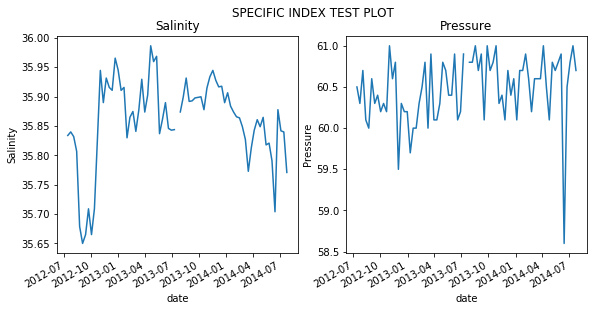

In [14]:
#selecting a specific index
Sal = DSet.Salinity[25]  #this selects the 26th data point in the altitude for salinity
Pres = DSet.Pressure[10] #this selects the 11th data point in the altitude for the Pressure

#subplot for the 2 selected data usin a for loop. :-)
plots=(Sal,Pres)
p_names=('Salinity','Pressure')


plt.figure(figsize=(9.5,4))
for i in range(2):
    plt.suptitle('SPECIFIC INDEX TEST PLOT')
    plt.subplot(1,2,i+1)
    plots[i].plot()
    plt.title(p_names[i])

To select specific sections of the data can be done using either the **index** or the **dimension** 

In [15]:
#using index to select first 50 altitudes of the pressure
P_index = DSet.Pressure[:50]
print(P_index.shape, P_index.dims)

#using dimension
P_dims = DSet.Pressure.sel(altitude=slice(0,49)) 
print(P_dims.shape,P_dims.dims)

(50, 75) ('altitude', 'date')
(50, 75) ('altitude', 'date')


Calculating **MEANS** on the selected Pressure data ( P_index) 

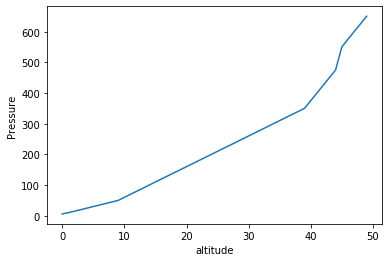

In [16]:
#time mean 
P_timmean = P_index.mean('date').plot()


This calculates the time mean for each point using the date axis. This can also be done choosing the axis the mean should be calculated on.

***P_timmean = P_index.mean(axis=0).plot()***

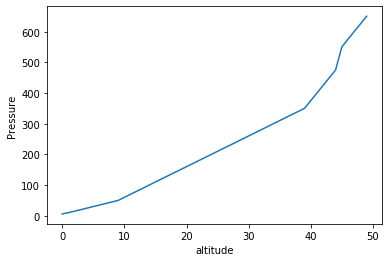

In [17]:
P_timmean = P_index.mean(axis=1).plot() # axis 0 is the altitude 

For a spatial plot we must calculate the mean over **time(climatology)**. We can also plot the **longitude** or **latitude** against the **data variable**. This time, let us go to our initial data that was originally called using the xarray mode.(nc_data)

/home/quagraine/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


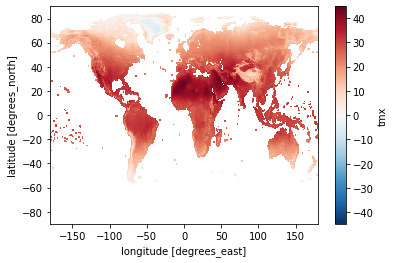

In [18]:
nc_data.tmx.mean('time').plot()

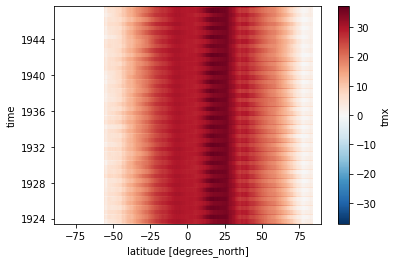

In [19]:
nc_data.tmx.sel(time=slice('1923','1947')).mean('lon').plot()   #this collapses the longitude into one and plots the latitude and the 

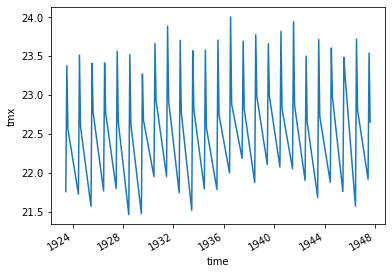

In [20]:
nc_data.tmx.sel(time=slice('1923','1947')).mean(['lon','lat']).plot() #this gives a time series plot

Now let us convert our maximum temperature data into Kelvin instead of degrees Celcius by adding 273.15 to the data variable and plotting it as a contour plot. 

In [21]:
K_Temp=nc_data.tmx + 273.15

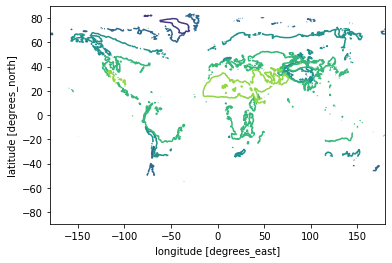

In [22]:
K_Temp.mean('time').plot.contour()

**HOVMOLLER PLOT** 

A hovmoller plot is a plot that plots the time against one cordinate of  the longitude or latitude. 

We would be using a different dataset for this plot. Precisely a Global Mean Temperature dataset for this.

In [87]:
hov_data = xr.open_dataset('/home/quagraine/Desktop/projdata/cru_ts4.02.1901.2017.tmp.dat.nc').sel(time=slice('1920','1930'))
#hov_anom = hov_data.tmp - hov_data.mean('time')

/home/quagraine/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [100]:
hov_M_anom=hov_data.tmp.groupby('time.month').mean('time')    

Then we continue to make the plot of the Anomaly dataset. In this case, we would hold the **latitude** as constant and plot the hovmoeller using the **time** and the **longitude**

*NB: We inculcate some of the matplot library skills that we have done so far on this* 

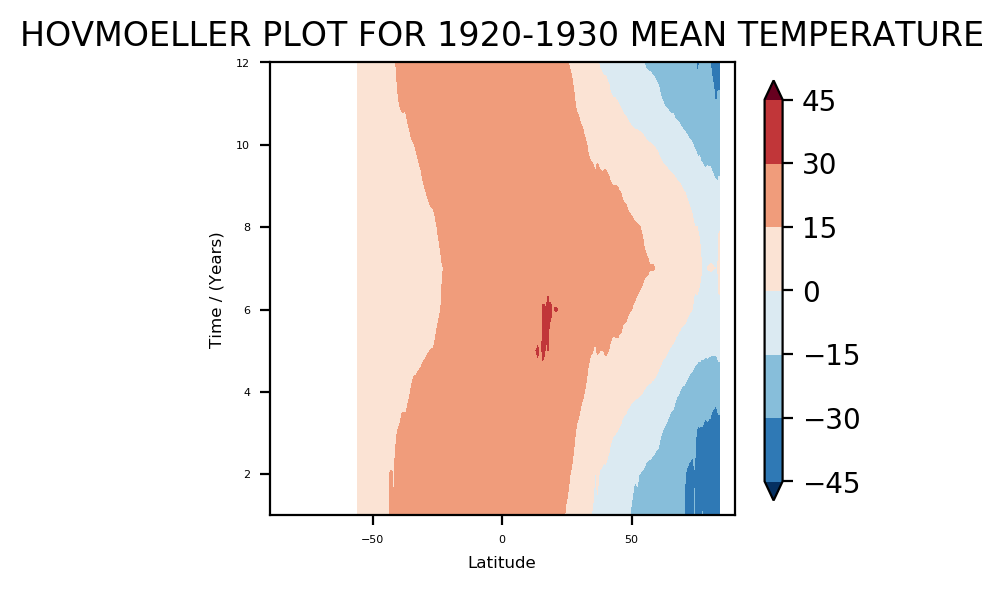

In [101]:
#making the Hovmoeller plot and adding labels using matplotlib
fig=plt.figure(figsize=(3,3),dpi=200)
Hov = hov_M_anom.mean('lon').plot.contourf(add_colorbar=False,extend='both')
plt.title('HOVMOELLER PLOT FOR 1920-1930 MEAN TEMPERATURE',fontsize=12)
plt.xlabel('Latitude',fontsize=6)
plt.ylabel('Time / (Years)',fontsize = 6)
plt.xticks(fontsize = 4, rotation=360)
plt.yticks(fontsize = 4, rotation=360)
cbar_axim = fig.add_axes([0.95, 0.15, 0.03, 0.7])
cbar = fig.colorbar(Hov,cbar_axim)

**STUDENTS TEST**

Select the African longitude and latitude data from the dataset **nc_data** and plot it as:
* a spatial plot
* a time series plot 
* holding the latitude down, plot the data against the longitude 

**hint:** *use https://bboxfinder.com to find the boundary box for Africa*

In [56]:
hov_anom = hov_data - hov_data.mean('time')
hov_anom.min()


<xarray.Dataset>
Dimensions:  ()
Data variables:
    tmp      float64 -36.72
    stn      float64 -5.955

**ADDING MAP OUTLINE**

There many ways to add a map outline to a spatial plot but for this tuition, we would be focusing mostly on Basemap and Cartopy.
Firstly lets install cartopy through our Anaconda Navigator application or by pip installin or using the terminal. 

conda install -c conda-forge cartopy for terminal anaconda users or follow this link to install https://pypi.org/project/Cartopy/